# Reconocimiento de dígitos con KNN



Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [4]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

import pandas as pd
import numpy as np
import metnum as mt
from sklearn.neighbors import KNeighborsClassifier
from numpy import savetxt

#percentage over total of train cases
NUMBER_OF_TRAIN_CASES = 0.3

# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version

%load_ext autoreload
%autoreload 2

df_train = pd.read_csv("../data/train.csv")
df_train = df_train[0: round(NUMBER_OF_TRAIN_CASES*len(df_train))].sample(frac=1)

# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")


mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/jazzer/.pyenv/versions/3.6.5/bin/python (found version "3.6.5") 
-- Found PythonLibs: /home/jazzer/.pyenv/versions/3.6.5/lib/libpython3.6m.a
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/jazzer/Facultad/metodos_numericos/mt/tp2
-- Co

## Explorando los datos

Es un csv, con columnas por cada pixel

### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

En el primer caracter está el dígito a reconocer. Llamamos a esto `y_train`

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

### Balance de clases

¿Tenemos la misma cantidad de cada número?

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [2]:
# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = metnum.KNNClassifier(100)
#clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)

savetxt('X_train.csv', X_train, delimiter=',')
savetxt('y_train.csv', y_train, delimiter=',')
savetxt('X_val.csv', X_val, delimiter=',')
savetxt('y_val.csv', y_val, delimiter=',')

/home/jazzer/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jazzer/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/jazzer/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jazzer/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/jazzer/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may 

Accuracy: 0.9265476190476191
[0. 2. 2. ... 1. 2. 3.]
CPU times: user 15min 16s, sys: 6.65 s, total: 15min 22s
Wall time: 15min 20s


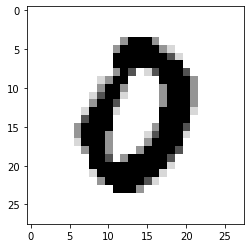

In [3]:
%%time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_val[0:])
acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))


In [ ]:
random_example= 3000

img = X_val[random_example].reshape(28, 28)
plt.imshow(img, cmap="Greys")

print("Prediction: {} - Digit: {}".format(y_pred[random_example], y_val[random_example]))